In [13]:
import os
import glob
import pandas as pd
from pathlib import Path, PosixPath
import matplotlib.pyplot as plt

In [14]:
workdir = os.path.dirname(os.getcwd())
input_dir = Path(f"{workdir}/5_module_evaluation/data/")
module_path = Path("/home/bbc8731/HSV/3_module_expansion/data/categories_methods")

In [15]:
# compute sensitivity/precision for all modules and all cutoffs, then save
module_files = sorted(module_path.rglob("*/consensus/uniprot_ppi.tsv"))
thresholds = [1, 2, 3, 4, 5, 6]

rows = []
for p in module_files:
    modules = pd.read_csv(p, sep=None, engine='python', comment='#')

    for cutoff in thresholds:
        
        filtered = modules.loc[modules['n_methods'] >= cutoff, :]
        module_genes = filtered['gene'].dropna().astype(str)

        rows.append({
            'category': p.parents[1].name,
            'cutoff': cutoff,
            'module_genes': len(module_genes),
            
        })

results_df = pd.DataFrame(rows).reset_index(drop=True)
out_path = input_dir / 'HSV_sensitivity_precision_all_modules_thresholds.csv'
# results_df.to_csv(out_path, index=False)


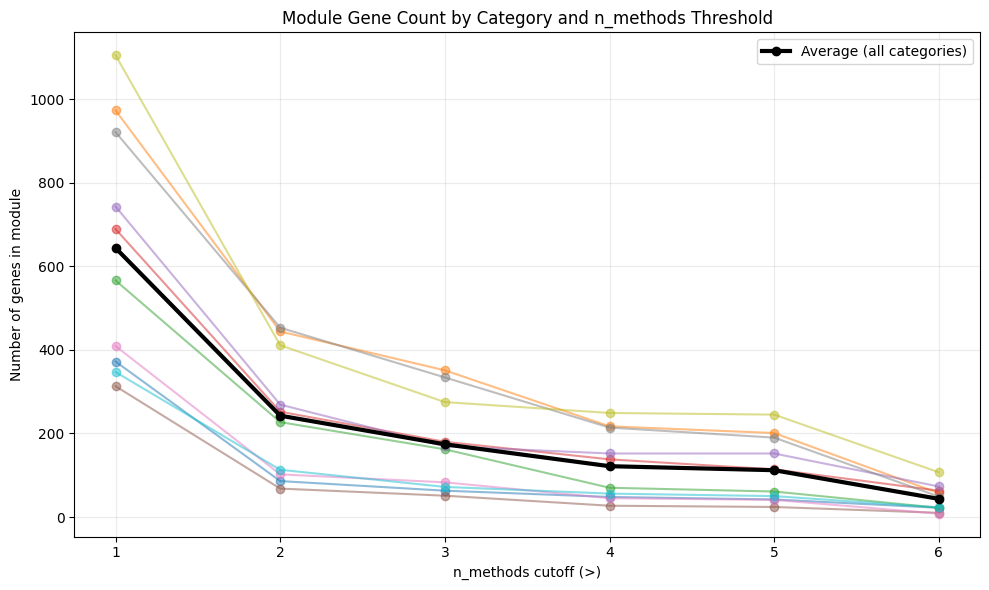

,cutoff,avg_module_genes
0,1,643.8
1,2,242.5
2,3,174.0
3,4,121.6
4,5,112.0
5,6,43.4


In [16]:
# plot: number of genes per category across thresholds + average
plot_df = (results_df
           .groupby(['category', 'cutoff'], as_index=False)['module_genes']
           .mean()
           .sort_values(['category', 'cutoff']))

avg_df = (plot_df
          .groupby('cutoff', as_index=False)['module_genes']
          .mean()
          .rename(columns={'module_genes': 'avg_module_genes'}))

fig, ax = plt.subplots(figsize=(10, 6))

# category-wise lines
for cat, sub in plot_df.groupby('category'):
    ax.plot(sub['cutoff'], sub['module_genes'], marker='o', linewidth=1.5, alpha=0.5)

# average line across categories
ax.plot(avg_df['cutoff'], avg_df['avg_module_genes'],
        marker='o', linewidth=3, color='black', label='Average (all categories)')

ax.set_title('Module Gene Count by Category and n_methods Threshold')
ax.set_xlabel('n_methods cutoff (>)')
ax.set_ylabel('Number of genes in module')
ax.grid(True, alpha=0.25)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

# table of per-threshold averages
avg_df

